d:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
d:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from ae_ckpt\model_encoder_encodedDim4_cluaterDim4.ckpt
0, total loss = 10.118672370910645, reconstruct loss = 0.016152380034327507, cluster loss = 0.04279854893684387, calm loss = 4.052404880523682, pilot loss = 13.262642860412598, max interval = -12.662253379821777, 
Train ACC: 0.5876288659793815, PTA: 0.2451171875, Test ACC: 0.5152671755725191
1, total loss = 10.059295654296875, reconstruct loss = 0.017018888145685196, cluster loss = 0.04131341725587845, calm loss = 4.026349067687988, pilot loss = 13.201233863830566, max interval = -12.62100887298584, 
Train ACC: 0.5876288659793815, PTA: 0.244140625, Test ACC: 0.5152671755725191
2, total loss = 10.001399993896484, reconstruct loss = 0.01671331562101841, cluster loss = 0.041906606405973434, calm loss = 4.000539302825928, pilot loss = 13.14033317565918, max interval = -12.580024719238281, 
Train ACC: 0.5876288659793815, PTA: 0.25390625, Test ACC: 0.5229007633587787
3, total loss = 9.944234848022461

d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


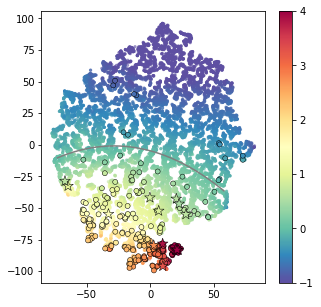

500, total loss = -3.0737805366516113, reconstruct loss = 0.11434384435415268, cluster loss = 0.04319662228226662, calm loss = 0.657113254070282, pilot loss = 8.088722229003906, max interval = -19.386690139770508, 
Train ACC: 0.8762886597938144, PTA: 0.3544921875, Test ACC: 0.9465648854961832
INFO:tensorflow:sdec_ckpt\model_supervise.ckpt is not in all_model_checkpoint_paths. Manually adding it.


<Figure size 432x288 with 0 Axes>

In [1]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import random
from Data_import import data_frame
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
tf.set_random_seed(1)
np.random.seed(1)
random.seed(1)
Data = data_frame()
import scipy.io as scio
# Data read
corridor_v_r_kashi = scio.loadmat('corridor_v_r_kashi_50m.mat')
corridor_v_r_zhongchuan = scio.loadmat('corridor_v_r_zhongchuan.mat')
corridor_v_r_daxing = scio.loadmat('corridor_v_r_daxing_50m.mat')
corridor_v_r_panzhihua = scio.loadmat('corridor_v_r_panzhihua_50m.mat')

corridor_v_r_kashi = corridor_v_r_kashi['corridor_v_r']
corridor_v_r_zhongchuan = corridor_v_r_zhongchuan['corridor_v_r']
corridor_v_r_daxing = corridor_v_r_daxing['corridor_v_r']
corridor_v_r_panzhihua = corridor_v_r_panzhihua['corridor_v_r']
corridor_v_r = np.vstack((corridor_v_r_kashi.T,corridor_v_r_zhongchuan.T,corridor_v_r_daxing,
                          corridor_v_r_panzhihua))
# Normalize the data from the other airports 
corridor_v_r = Data.std.transform(corridor_v_r)

clusternn = cluster_NN()
pilot_train_ = Data.pilot_semi_learning_generator(semi_ratio = 1)
metric_values = clusternn.train(Data,pilot_train_,train_steps = 501, BATCH_SIZE = 1024,
                                If_other_airports = True, other_airports_v = corridor_v_r)